this is Lesson 1.3

In [11]:
from math import sin, cos, log, ceil
import numpy
from matplotlib import pyplot
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

In [12]:
g = 9.8    #gravity in m/s^2
v_t = 30.0    # trim velocity in m/s
C_D = 1/40    # drag coeff
C_L = 1    # lift coeff

v0 = v_t    #start at trim velocity
theta0 = 0    #initial traj angle
x0 = 0    #horiz postn
y0 = 1000    #initial altitude

In [13]:
def f(u):
    v = u[0]
    theta = u[1]
    x = u[2]
    y = u[3]
    return numpy.array([-g*sin(theta) - C_D/C_L*g/v_t**2*v**2,
                       -g*cos(theta)/v + g/v_t**2*v,
                       v*cos(theta),
                       v*sin(theta)])

In [14]:
def euler_step(u, f, dt):
    return u + dt*f(u)

In [15]:
T = 100.0    #final time
dt = 0.1    #time increment
N = int(T/dt)+1    #number of time steps
t = numpy.linspace(0, T, N)    #time discretization

# intitalize array that will hold solution for each time step
u = numpy.empty((N,4))
u[0] = numpy.array([v0, theta0, x0, y0])    #first element will have init values

#Euler method time stepping
for n in range(N-1):
    u[n+1] = euler_step(u[n], f, dt)

In [30]:
x = u[:,2]
y = u[:,3]

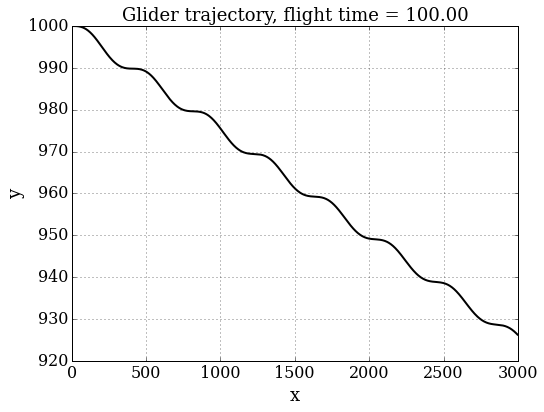

In [31]:
pyplot.figure(figsize=(8,6))
pyplot.grid(True)
pyplot.xlabel(r'x',fontsize=18)
pyplot.ylabel(r'y',fontsize=18)
pyplot.title('Glider trajectory, flight time = %.2f' %T, fontsize=18)
pyplot.plot(x,y,'k-', lw=2);

In [32]:
print(x)
print(y)

[    0.             3.             5.99755    ...,  2990.58184972
  2993.5409657   2996.50116014]
[ 1000.          1000.          1000.         ...,   926.4754105
   926.36795171   926.25798857]


In [33]:
len(x)
len(y)

1001

In [34]:
len (x) == len(y)

True

In [35]:
?numpy.empty_like

In [36]:
dt_values = numpy.array([0.1, 0.05, 0.01, 0.005, 0.001, 0.0001])
u_values = numpy.empty_like(dt_values, dtype=numpy.ndarray)

for i, dt in enumerate(dt_values):
    N = int(T/dt)+1
    t = numpy.linspace(0.0, T,N)
    u = numpy.empty((N,4))
    u[0] = numpy.array([v0,theta0, x0, y0])
    
    for n in range(N-1):
        u[n+1] = euler_step(u[n],f,dt)
    u_values[i] = u